In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
from tqdm.notebook import tqdm

grid_roads = pd.read_pickle('data/grid_roads.pkl').reset_index(drop=True)
selected_GU = ['강남구']
selected_GU = ['서울특별시 ' + gu for gu in selected_GU]

seoul = gpd.read_file('data/seoul_geo/seoul.shp').to_crs(epsg=5174)
seoul_selected = seoul[seoul.SGG_NM.isin(selected_GU)]
roads_selected = gpd.sjoin(grid_roads, seoul_selected, op='intersects')
roads_selected = roads_selected.reset_index(drop=True)

roads_selected.drop(columns=['index_right'], inplace=True)

/Users/dangchan/miniforge3/envs/colab/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [6]:
roads = gpd.read_file('data/seoul_road/Z_KAIS_TL_SPRD_MANAGE_11.shp', encoding='euc-kr', crs='epsg:5179')
roads = roads.to_crs('epsg:5174')
roads = roads[roads.ROA_CLS_SE.isin(['1','2','3'])]

In [7]:
roads

,ALWNC_DE,ALWNC_RESN,BSI_INT,ENG_RN,MVMN_DE,MVMN_RESN,MVM_RES_CD,NTFC_DE,OPERT_DE,RBP_CN,...,RDS_MAN_NO,REP_CN,RN,RN_CD,ROAD_BT,ROAD_LT,ROA_CLS_SE,SIG_CD,WDR_RD_CD,geometry
1,20100419,중랑천의 옛 이름인 한천에서 유래,10,Hancheon-ro,20100910,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100422,20141030220124,석관동 42-12대,...,409,장위동 311-42 천,한천로,3005038,2.000,11840.000,3,11290,2,"LINESTRING (205057.521 456982.902, 205054.086 ..."
5,20100605,용마공원의 이름을 인용하여 부여,20,Yongmagongwon-ro,None,"광역도로 정비 및 부여사유, 부여방식 정비",90,20100610,20101004,망우동403-70,...,1519,망우동산69-509,용마공원로,3106009,4.000,58.000,3,11260,3,"LINESTRING (208880.447 454615.840, 208875.306 ..."
11,20090701,태조 이성계 무덤에서 유래된 역사성 반영,20,Mangu-ro,20130313,직권수정(속성변경),99,20090710,20190610145717,휘경동 343-23,...,374,휘경동 7-42,망우로,3005032,7.000,6.000,3,11230,2,"LINESTRING (205121.742 454090.416, 205100.672 ..."
12,20100514,이 마을에 고려 때 명신(名臣)이 있었다는 데에서 유래된 장위동의 동명을 인용하여 부여,10,Jangwi-ro,20100920,직권수정(속성변경),99,20100610,20191007161524,장위동 231-565대,...,412,장위동 270-58천,장위로,3107013,3.000,76.000,3,11290,3,"LINESTRING (204538.854 456841.191, 204540.432 ..."
32,20100205,서울시립대학교로 가는 주도로,10,Seoulsiripdae-ro,None,직권수정(속성변경),99,20100205,20190507110326,답십리동 465-2,...,736,전농동 152-11,서울시립대로,3105004,6.000,93.000,3,11230,3,"LINESTRING (204119.427 452620.559, 204056.601 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66947,20240425,지하도로 신규생성,20,Sapyeongjihado-ro,20240412,지하도로 신규생성,01,20240412,20240425170733,반포동 128-12,...,5347,반포동 128-11,사평지하도로,3354396,7.724,607.767,3,11650,3,"LINESTRING (199934.016 444282.672, 199994.757 ..."
66948,20230407,고가도로를 나타내는 명칭 부칭 부여,20,Gangnamteomineolgogado-ro,20230407,고가도로를 나타내는 명칭 부칭 부여,01,20230407,20240429101906,반포동 128-3,...,5366,반포동 128-2,강남터미널고가도로,3354401,15.400,569.209,3,11650,3,"LINESTRING (200172.250 444525.234, 200150.936 ..."
66949,20230407,지하도로를 나타내는 명칭 부칭 부여,20,Yeomgokjihado-ro,20230407,지하도로를 나타내는 명칭 부칭 부여,01,20230407,20240429102430,양재동 238-1,...,5369,양재동 238-0,염곡지하도로,3354402,11.000,639.152,3,11650,3,"LINESTRING (203964.978 440134.243, 203941.892 ..."
66950,20230407,지하도로를 나타내는 명칭 부칭 부여,20,Yeomgokdongseojihado-ro,20230407,지하도로를 나타내는 명칭 부칭 부여,01,20230407,20240429102639,양재동 238-2,...,5370,양재동 404-0,염곡동서지하도로,3354403,10.000,749.178,3,11650,3,"LINESTRING (203483.449 440165.804, 203527.340 ..."


  0%|          | 0/1448 [00:00<?, ?it/s]

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


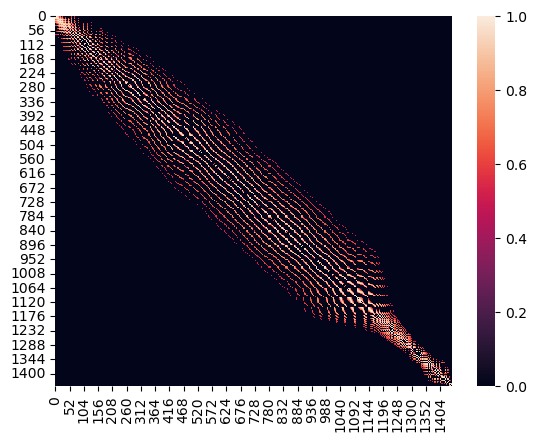

In [2]:
# Get adjacency matrix

# DistanceBand

xs = roads_selected.geometry.centroid.x / 1000
ys = roads_selected.geometry.centroid.y / 1000

eps = 0.5
sigma = 1.0

# w_ij = exp(- d_ij^2 / sigma^2) if i != j and w_ij >= eps

n = len(roads_selected)
W = np.zeros((n, n))

for i in tqdm(range(n)):
    for j in range(i+1, n):
        d = (xs[i] - xs[j])**2 + (ys[i] - ys[j])**2
        w = np.exp(- (d / sigma**2))
        if w >= eps:
            W[i, j] = w
            W[j, i] = w

import seaborn as sns
sns.heatmap(W)

np.save('STGCN/data/adj_mx.npy', W)